## Q1

### Understanding the data - Exploration 

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity

In [167]:
#read the data files and assign headers
columnsUdata=["userId","movieId",'Rating', 'timestamp']

columnsUitem = [
"movieId", "title", "release_date", "unknownHeader", "IMDb_URL", 
"unknownGenre", "actionGenre", "adventureGenre", "animationGenre", "childrenGenre", "comedyGenre", 
"crimeGenre", "documentaryGenre", "dramaGenre", "fantasyGenre", "film-noirGenre", "horrorGenre", 
"musicalGenre", "mysteryGenre", "romanceGenre", "sci-fiGenre", "thrillerGenre", "warGenre", "westernGenre"]


ratings1 = pd.read_csv('u.data', sep='\t', header=None, names = columnsUdata)
ratingsOver50 = ratings1.groupby('userId')['movieId'].count()
# Filter for users who have rated more than 50 movies
ratingsOver50 = ratingsOver50[ratingsOver50 > 50]
# Filter the original ratings DataFrame to keep only above users
ratings2 = ratings1[ratings1['userId'].isin(ratingsOver50.index)]
moviesOver50 = ratings2.groupby('movieId')['userId'].count()
moviesOver50 = moviesOver50[moviesOver50 > 50]  # Keep only movies with more than 50 ratings
ratings = ratings2[ratings2['movieId'].isin(moviesOver50.index)]

movies = pd.read_csv('u.item', sep='|', header=None, names=columnsUitem, encoding='ISO-8859-1')
#print movies to check the columns
movies.head()

,movieId,title,release_date,unknownHeader,IMDb_URL,unknownGenre,actionGenre,adventureGenre,animationGenre,childrenGenre,...,fantasyGenre,film-noirGenre,horrorGenre,musicalGenre,mysteryGenre,romanceGenre,sci-fiGenre,thrillerGenre,warGenre,westernGenre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [169]:
#check for null values
ratings.isna().sum() 
#No nulls detected

userId       0
movieId      0
Rating       0
timestamp    0
dtype: int64

In [171]:
#check for null values
movies.isna().sum() 
#after checking the columns that contain nulls, we decided no further actions since these columns are not needed

movieId                0
title                  0
release_date           1
unknownHeader       1682
IMDb_URL               3
unknownGenre           0
actionGenre            0
adventureGenre         0
animationGenre         0
childrenGenre          0
comedyGenre            0
crimeGenre             0
documentaryGenre       0
dramaGenre             0
fantasyGenre           0
film-noirGenre         0
horrorGenre            0
musicalGenre           0
mysteryGenre           0
romanceGenre           0
sci-fiGenre            0
thrillerGenre          0
warGenre               0
westernGenre           0
dtype: int64

In [175]:
#converting difficult to read timestamp from ratings dataset to readable format
ratings.loc[:, 'timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,Rating,timestamp
1,186,302,3,1998-04-04 19:22:22
3,244,51,2,1997-11-27 05:02:03
5,298,474,4,1998-01-07 14:20:06
6,115,265,2,1997-12-03 17:51:28
7,253,465,5,1998-04-03 18:34:27


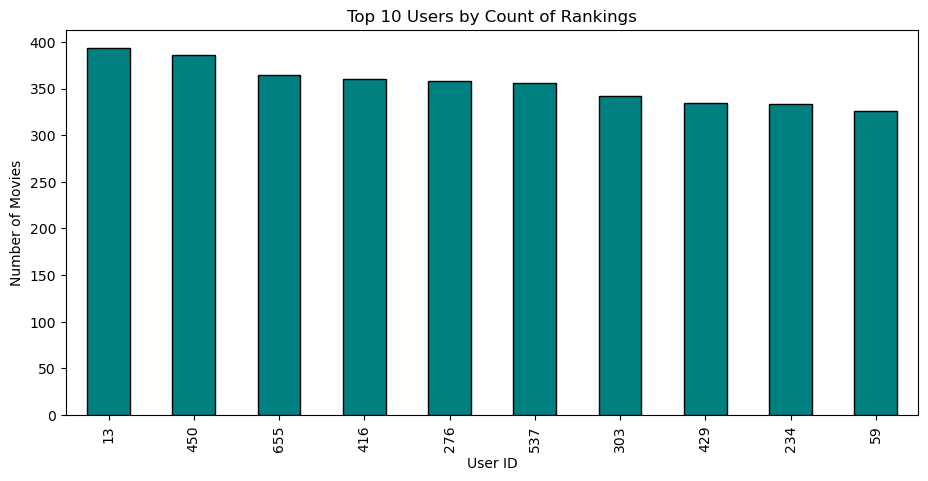

In [177]:
# number of movies seen by each user, descending order 
moviecount = ratings.groupby('userId')['movieId'].count()
moviecount_orderdesc = moviecount.sort_values(ascending=False)

# Plot of the 10 top users with highest count of rankings 
top20 = moviecount_orderdesc.head(10)
plt.figure(figsize=(11, 5))
top20.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Users by Count of Rankings')
plt.xlabel('User ID')
plt.ylabel('Number of Movies')
plt.show()


In [179]:
ratingsFreq = ratings.groupby('Rating')['Rating'].count()

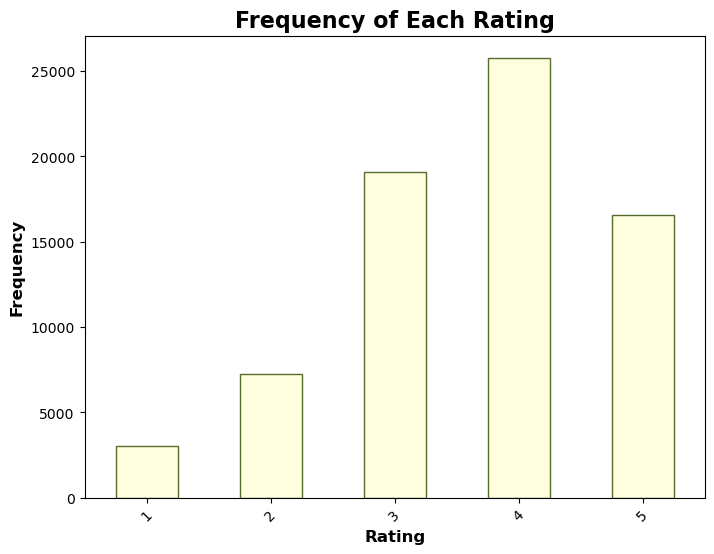

In [181]:
plt.figure(figsize=(8, 6))
ratingsFreq.plot(kind='bar', color='lightyellow', edgecolor='darkolivegreen')
plt.title('Frequency of Each Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [183]:
# calculate average ratings for each movie and show top 15
avgRatings = ratings.groupby('movieId', as_index=False)['Rating'].mean()
top15Movies = avgRatings.sort_values('Rating', ascending=False)
top15Movies.head(15)

,movieId,Rating
266,318,4.474074
310,408,4.473684
364,483,4.472477
139,169,4.462963
51,64,4.447876
91,114,4.433333
430,603,4.381720
38,50,4.376906
10,12,4.373984
148,178,4.345133


In [185]:
# merge with movies dataset to get the movie names
top15MoviesWithNames = top15Movies.merge(movies[['movieId', 'title']], on='movieId').head(15)
top15MoviesWithNames = top15MoviesWithNames.rename(columns={'Rating': 'Average Rating'})
top15MoviesWithNames

,movieId,Average Rating,title
0,318,4.474074,Schindler's List (1993)
1,408,4.473684,"Close Shave, A (1995)"
2,483,4.472477,Casablanca (1942)
3,169,4.462963,"Wrong Trousers, The (1993)"
4,64,4.447876,"Shawshank Redemption, The (1994)"
5,114,4.433333,Wallace & Gromit: The Best of Aardman Animatio...
6,603,4.381720,Rear Window (1954)
7,50,4.376906,Star Wars (1977)
8,12,4.373984,"Usual Suspects, The (1995)"
9,178,4.345133,12 Angry Men (1957)


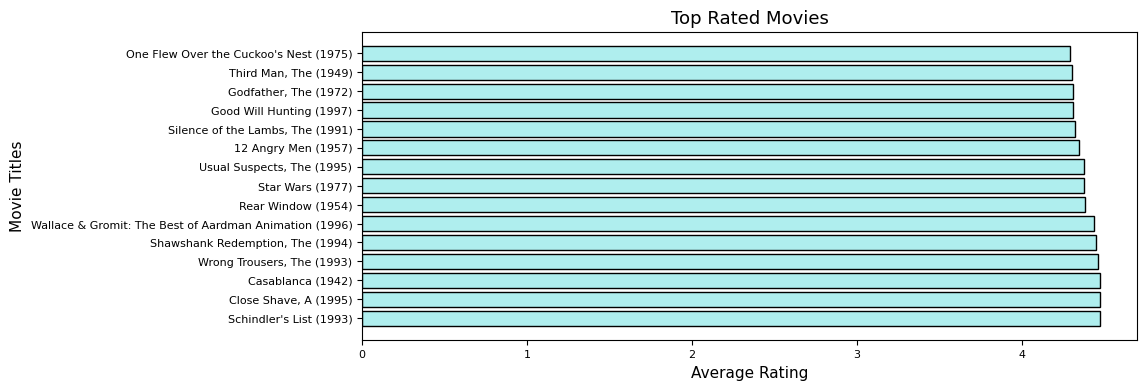

In [187]:
plt.figure(figsize=(10, 4))
plt.barh(top15MoviesWithNames['title'], top15MoviesWithNames['Average Rating'], color='paleturquoise', edgecolor='black')
plt.title('Top Rated Movies', fontsize=13)
plt.xlabel('Average Rating', fontsize=11)
plt.ylabel('Movie Titles', fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [189]:
# z score to detect outliers
userRatingsCount = ratings.groupby('userId')['movieId'].count()
movieViewsCount = ratings.groupby('movieId')['userId'].count()
userRatingsZscore = (userRatingsCount - userRatingsCount.mean()) / userRatingsCount.std()
movieViewsZscore = (movieViewsCount - movieViewsCount.mean()) / movieViewsCount.std()
userRatingsCount

userId
1      230
2       52
3       34
5      132
6      189
      ... 
936     97
938     94
940    100
942     69
943    144
Name: movieId, Length: 563, dtype: int64

In [191]:
# outliers = higher than the threshold 3
userOutliers = userRatingsZscore[userRatingsZscore.abs() > 3]
movieOutliers = movieViewsZscore[movieViewsZscore.abs() > 3]
print('Users Rating OUtliers:\n', userOutliers, '\n\n', 'Movies Rating OUtliers:\n', movieOutliers)

Users Rating OUtliers:
 userId
13     3.570382
276    3.099920
416    3.126803
450    3.476290
537    3.073036
655    3.180571
Name: movieId, dtype: float64 

 Movies Rating OUtliers:
 movieId
1      3.221992
50     4.589272
56     3.208181
98     3.125316
100    3.732996
121    3.208181
174    3.525832
181    3.788239
Name: userId, dtype: float64


In [193]:
# change u.data file to desired format for collaborative filtering
ratingsFinal = ratings.pivot_table(index='userId', columns='movieId', values='Rating', aggfunc='mean')
ratingsFinal = ratingsFinal.fillna(0)
ratingsFinal.head()

movieId,1,2,3,4,5,7,8,9,10,11,...,1035,1039,1041,1047,1048,1065,1073,1074,1101,1119
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,4.0,1.0,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q2

### Basic Recommender System

In [197]:
# «training» (80%) and «testing» (20%) sets
train, test = train_test_split(ratings, test_size=0.2, random_state=42)
print('Training data:', {train.shape[0]}, 'ratings')
print('Test data:', {test.shape[0]}, 'ratings')

Training data: {57372} ratings
Test data: {14344} ratings


#### Version 1 - Each user of the test set is recommended the top-rated movies

In [200]:

top5mostRatedMovies = train.groupby('movieId')['Rating'].count().sort_values(ascending=False).head().index.tolist()

test_users = test['userId'].unique()
recommendationsTop = {user: top5mostRatedMovies for user in test_users}

#### Version 2 - Each user of the test set receives recommended movies randomly.

In [203]:
random.seed(42)
fiverandomMovies = random.sample(list(train['movieId'].unique()), 5)
recommendationsRandom = {user: fiverandomMovies for user in test_users}

#### Evaluation

##### a.	Obtain the top 5 recommendations from the system on each user of the testing set

In [207]:
# top rated movies with titles
top5_movies_with_names = pd.DataFrame({'movieId': top5mostRatedMovies}).merge(movies[['movieId', 'title']], on='movieId')

# Random movies with titles
random_movies_with_names = pd.DataFrame({'movieId': fiverandomMovies}).merge(movies[['movieId', 'title']], on='movieId')

print("Top 5 Most Rated Movies with Titles:\n", top5_movies_with_names)
print("\n5 Random Movies with Titles:\n", random_movies_with_names)

Top 5 Most Rated Movies with Titles:
    movieId                           title
0       50                Star Wars (1977)
1      100                    Fargo (1996)
2      181       Return of the Jedi (1983)
3      174  Raiders of the Lost Ark (1981)
4      121   Independence Day (ID4) (1996)

5 Random Movies with Titles:
    movieId                          title
0      408          Close Shave, A (1995)
1       21  Muppet Treasure Island (1996)
2      576             Cliffhanger (1993)
3      514              Annie Hall (1977)
4      327                Cop Land (1997)


#### Mean Absolute Error (MAE) - Root Mean Square Error (RMSE)

##### i) Top Rated Recommended Movies

In [211]:
predictions = []
actuals = []

for user in test_users:
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies:
        if movie_id in user_ratings['movieId'].values:
            actual = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted = train[train['movieId'] == movie_id]['Rating'].values[0]
            #predicted = np.mean(train[train['movieId'] == movie_id]['Rating'])  # Predicted as the average rating
            predictions.append(predicted)
            actuals.append(actual)

# MAE and RMSE
top5_mae = mean_absolute_error(actuals, predictions)
top5_rmse = np.sqrt(mean_squared_error(actuals, predictions))

print('MAE:', top5_mae, 'RMSE:', top5_rmse)

MAE: 0.9207650273224044 RMSE: 1.251228904114592


##### ii) Random Recommended Movies

In [214]:
predictions = []
actuals = []

for user in test_users:
    user_ratings = test[test['userId'] == user]
    
    for movie_id in fiverandomMovies:
        if movie_id in user_ratings['movieId'].values:
            actual = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted = train[train['movieId'] == movie_id]['Rating'].values[0]
            #predicted = np.mean(train[train['movieId'] == movie_id]['Rating'])  # Predicted as the average rating
            predictions.append(predicted)
            actuals.append(actual)

# MAE and RMSE
random_mae = mean_absolute_error(actuals, predictions)
random_rmse = np.sqrt(mean_squared_error(actuals, predictions))

print('MAE:', random_mae, 'RMSE:', random_rmse)


MAE: 0.9326923076923077 RMSE: 1.3265049508446565


#### Precision - Recall - F1

##### i) Top Rated Recommended Movies

In [218]:
threshold = 3.5

tp = fp = fn = 0

for user in test_users:
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies:
        if movie_id in user_ratings['movieId'].values:
            actual_rating = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted_rating = train[train['movieId'] == movie_id]['Rating'].values[0]
            #predicted_rating = np.mean(train[train['movieId'] == movie_id]['Rating'])  # Predicted as the average rating
            
            if predicted_rating >= threshold and actual_rating >= threshold:
                tp += 1
            elif predicted_rating >= threshold and actual_rating < threshold:
                fp += 1
            elif predicted_rating < threshold and actual_rating >= threshold:
                fn += 1

# Precision, Recall, and F1 Calculation
top5_precision = tp / (tp + fp) if (tp + fp) != 0 else 0
top5_recall = tp / (tp + fn) if (tp + fn) != 0 else 0
top5_f1 = 2 * top5_precision * top5_recall / (top5_precision + top5_recall) if (top5_precision + top5_recall) != 0 else 0

print('True Positives TP:', tp)
print('False Positives FP:', fp)
print('False Negatives FN:', fn)
print('Precision:', top5_precision)
print('Recall:', top5_recall)
print('F1:', top5_f1)


True Positives TP: 183
False Positives FP: 39
False Negatives FN: 98
Precision: 0.8243243243243243
Recall: 0.6512455516014235
F1: 0.727634194831014


##### ii) Random Recommended Movies

In [221]:
threshold = 3.5

tp = fp = fn = 0

for user in test_users:
    user_ratings = test[test['userId'] == user]
    
    for movie_id in fiverandomMovies:
        if movie_id in user_ratings['movieId'].values:
            actual_rating = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted_rating = train[train['movieId'] == movie_id]['Rating'].values[0]
            #predicted_rating = np.mean(train[train['movieId'] == movie_id]['Rating'])  # Predicted as the average rating
            
            if predicted_rating >= threshold and actual_rating >= threshold:
                tp += 1
            elif predicted_rating >= threshold and actual_rating < threshold:
                fp += 1
            elif predicted_rating < threshold and actual_rating >= threshold:
                fn += 1

# Precision, Recall, and F1 Calculation
random_precision = tp / (tp + fp) if (tp + fp) != 0 else 0
random_recall = tp / (tp + fn) if (tp + fn) != 0 else 0
random_f1 = 2 * random_precision * random_recall / (random_precision + random_recall) if (random_precision + random_recall) != 0 else 0

print('True Positives TP:', tp)
print('False Positives FP:', fp)
print('False Negatives FN:', fn)
print('Precision:', random_precision)
print('Recall:', random_recall)
print('F1:', random_f1)


True Positives TP: 53
False Positives FP: 36
False Negatives FN: 4
Precision: 0.5955056179775281
Recall: 0.9298245614035088
F1: 0.726027397260274


In [223]:
metrics_data = {
    'Strategy': ['Top-5 Most Rated', 'Random Movies'],
    'MAE': [round(top5_mae, 3), round(random_mae, 3)],  
    'RMSE': [round(top5_rmse, 3), round(random_rmse, 3)],  
    'Precision': [round(top5_precision, 3), round(random_precision, 3)],  
    'Recall': [round(top5_recall, 3), round(random_recall, 3)],  
    'F1 Score': [round(top5_f1, 3), round(random_f1, 3)],  
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df


,Strategy,MAE,RMSE,Precision,Recall,F1 Score
0,Top-5 Most Rated,0.921,1.251,0.824,0.651,0.728
1,Random Movies,0.933,1.327,0.596,0.930,0.726


## Q3

### Collaborative Filtering

#### Compute Cosine Similarity

In [228]:
# function to compute cosine similarity 
def findKSimilar(r, k):
    nUsers = r.shape[0] 
    nItems = r.shape[1] 
    similarUsers = -1 * np.ones((nUsers, k))  # initialize the array to store k similar users
    similarities = cosine_similarity(r)  # compute cosine similarity for all users
    
    for i in range(0, nUsers):
        simUsersIdxs = np.argsort(similarities[:, i])[::-1]  # sort by similarity (in descending order)
        for l in range(k):  # loop over k similar users
            similarUsers[i, l] = simUsersIdxs[l]  # store the top k similar users  
    return similarUsers, similarities

# function to predict the rating
def predict(userId, itemId, r, similarUsers, similarities):
    nCols = similarUsers.shape[1] 
    sum = 0.0
    similarity_sum = 0.0

    for l in range(0, nCols):
        neighbor = int(similarUsers[userId, l])  
        if r[neighbor, itemId] != 0:  # if neighbor has rated the item
            sum += r[neighbor, itemId] * similarities[neighbor, userId]
            similarity_sum += similarities[neighbor, userId]
    
    if similarity_sum > 0:
        return sum / similarity_sum
    else:
        return 0 
        
# Randomly hide 20% of the interactions’ matrix 
def hide_random_data(r, percentage=0.2):
    nUsers, nItems = r.shape
    total_elements = nUsers * nItems
    num_to_hide = int(total_elements * percentage)

    # Randomly choose to set to 0
    indices = random.sample(range(total_elements), num_to_hide)

    for idx in indices:
        userId = idx // nItems
        itemId = idx % nItems
        r[userId, itemId] = 0  # Set the rating to 0 (hidden)
    
    return r
    
r = ratingsFinal.to_numpy()
r_hidden = r.copy()  # Make a copy of the original ratings df
random.seed(42) # to get same data when re-run
r_hidden = hide_random_data(r_hidden, 0.2)  # Hide 20% of the data

k = 3
similarUsers, similarities = findKSimilar(r_hidden, k)

predicted_ratings = r.copy()

for userId in range(r.shape[0]):
    for itemId in range(r.shape[1]):
        if r_hidden[userId, itemId] == 0:  # Only predict on the hidden ratings
            predicted_ratings[userId, itemId] = predict(userId, itemId, r, similarUsers, similarities)

#### Generate the top 5 recommendations per user

In [231]:
top_5_recommendations = {}

for userId in range(r.shape[0]):
    user_predictions = predicted_ratings[userId, :]

    top_movies = np.argsort(user_predictions)[::-1][:5]  # top 5 ratings
    top_5_recommendations[userId] = top_movies

# Convert top 5 recommendations to a DataFrame for easy viewing
top_5_recommendations_df = pd.DataFrame.from_dict(top_5_recommendations, orient='index')
top_5_recommendations_df.columns = [f'TopMovie{i+1}' for i in range(5)]

print(top_5_recommendations_df)

     TopMovie1  TopMovie2  TopMovie3  TopMovie4  TopMovie5
0            0        145        140        142         51
1          229        264         83        241        392
2          282        280        106        107        433
3          310         84         32        332        331
4          365        356        483        360        355
..         ...        ...        ...        ...        ...
558        215        535        102        242        239
559        229         87        230         94        539
560        388        102         79        284         80
561        163        475        365        283        361
562        225        385        539        152        537

[563 rows x 5 columns]


#### MAE, RMSE, precision, recall, F1

In [234]:
maeCF = 0
rmseCF = 0
hidden_count = 0
nUsers, nItems = r.shape

for i in range(0, nUsers):
    for j in range(0, nItems):
        if r_hidden[i, j] == 0:  # Only compute hidden values
            rhat = predicted_ratings[i, j]
            maeCF += np.abs(rhat - r[i, j])
            rmseCF += (rhat - r[i, j]) ** 2
            hidden_count += 1

# take into account mae over hidden values for better results
maeCF = maeCF / hidden_count if hidden_count > 0 else 0
rmseCF = np.sqrt(rmseCF / hidden_count) if hidden_count > 0 else 0


print('Mean Absolute Error (MAE) =', maeCF)
print('Root Mean Squared Error (RMSE) =', rmseCF)

# Precision, recall and F1 only in hidden data
threshold = 3.5 # threshold = 3.5 ratings
tp = fp = fn = 0

for userId in range(nUsers):
    # Get the top 5 recommended movies for the user from previous step
    top_movies = top_5_recommendations_df.loc[userId].values

    # Iterate for the top 5 recommendations
    for movieId in top_movies:
        if r[userId, movieId] >= threshold: 
            tp += 1  # True positive: 
        else:
            fp += 1  # False positive
    #  to find false negatives:
    for movieId in range(nItems):
        if movieId not in top_movies and r[userId, movieId] >= threshold: 
            fn += 1 

# Calculate precision, recall, F1 score
precisionCF = tp / (tp + fp) if (tp + fp) > 0 else 0
recallCF = tp / (tp + fn) if (tp + fn) > 0 else 0
f1CF = 2 * precisionCF * recallCF / (precisionCF + recallCF)

print('Precision =', precisionCF)
print('Recall =', recallCF)
print('F1 =', f1CF)

Mean Absolute Error (MAE) = 1.1998912949470613
Root Mean Squared Error (RMSE) = 2.097090166642327
Precision = 0.5609236234458259
Recall = 0.03725550338579147
F1 = 0.0698703482454976


In [236]:
metrics_CF = {
    'Strategy': ['Collaborative Filtering'],
    'MAE': [round(maeCF, 3)],  # Replace with calculated MAE values
    'RMSE': [round(rmseCF, 3)],  # Replace with calculated RMSE values
    'Precision': [round(precisionCF, 3)],  # Replace with calculated Precision values
    'Recall': [round(recallCF, 3)],  # Replace with calculated Recall values
    'F1 Score': [round(f1CF, 3)],  # Replace with calculated F1 values
}

metricsFinalCF = pd.DataFrame(metrics_CF)

metricsFinalCF

,Strategy,MAE,RMSE,Precision,Recall,F1 Score
0,Collaborative Filtering,1.2,2.097,0.561,0.037,0.07


## Q4

### Top-Rated and Random Movies Recommendations based on user gender

In [240]:
# implementing q2, 5 top-rated movies.
# here separated by gender 

# read user demographic data file 
columnsUuser=['userId', 'age', 'sex', 'occupation', 'zipcode']
user1 = pd.read_csv('u.user', sep='|', header=None, names=columnsUuser)
user = user1.reset_index(drop=True)

ratings_with_gender = train.merge(user[['userId', 'sex']], on='userId', how='left')

ratings_men = ratings_with_gender[ratings_with_gender['sex'] == 'M']
ratings_women = ratings_with_gender[ratings_with_gender['sex'] == 'F']

# 5 most rated movies
top5mostRatedMovies_men = ratings_men.groupby('movieId')['Rating'].count().sort_values(ascending=False).head().index.tolist()
top5mostRatedMovies_women = ratings_women.groupby('movieId')['Rating'].count().sort_values(ascending=False).head().index.tolist()

test_users = test['userId'].unique()

# Make recommendations for men and women separately
recommendations_men = {user: top5mostRatedMovies_men for user in test_users if user in ratings_men['userId'].values}
recommendations_women = {user: top5mostRatedMovies_women for user in test_users if user in ratings_women['userId'].values}

predictions = []
actuals = []

# for men
for user in recommendations_men.keys():
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies_men:
        if movie_id in user_ratings['movieId'].values:
            actual = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted = train[train['movieId'] == movie_id]['Rating'].values[0] 
            predictions.append(predicted)
            actuals.append(actual)

# computing MAE and RMSE for men
mae_men = mean_absolute_error(actuals, predictions)
rmse_men = np.sqrt(mean_squared_error(actuals, predictions))

print('MAE for Men:', mae_men, 'RMSE for Men:', rmse_men)

# Reset the list to accept women values 
predictions = []
actuals = []

# for women
for user in recommendations_women.keys():
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies_women:
        if movie_id in user_ratings['movieId'].values:
            actual = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted = train[train['movieId'] == movie_id]['Rating'].values[0]
            predictions.append(predicted)
            actuals.append(actual)

# computing MAE and RMSE for women
mae_women = mean_absolute_error(actuals, predictions)
rmse_women = np.sqrt(mean_squared_error(actuals, predictions))

print('\nMAE for Women:', mae_women, 'RMSE for Women:', rmse_women)

# Precision, Recall, F1 for all
threshold = 3.5
tp_men = fp_men = fn_men = 0
tp_women = fp_women = fn_women = 0

# for men
for user in recommendations_men.keys():
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies_men:
        if movie_id in user_ratings['movieId'].values:
            actual_rating = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted_rating = train[train['movieId'] == movie_id]['Rating'].values[0] 
            
            if predicted_rating >= threshold and actual_rating >= threshold:
                tp_men += 1
            elif predicted_rating >= threshold and actual_rating < threshold:
                fp_men += 1
            elif predicted_rating < threshold and actual_rating >= threshold:
                fn_men += 1

# Precision, Recall, and F1 for men
precision_men = tp_men / (tp_men + fp_men) if (tp_men + fp_men) != 0 else 0
recall_men = tp_men / (tp_men + fn_men) if (tp_men + fn_men) != 0 else 0
f1_men = 2 * precision_men * recall_men / (precision_men + recall_men) if (precision_men + recall_men) != 0 else 0

print('\nTrue Positives TP for Men:', tp_men)
print('False Positives FP for Men:', fp_men)
print('False Negatives FN for Men:', fn_men)
print('Precision for Men:', precision_men)
print('Recall for Men:', recall_men)
print('F1 for Men:', f1_men)

# reset variables for women
tp_women = fp_women = fn_women = 0

# for women
for user in recommendations_women.keys():
    user_ratings = test[test['userId'] == user]
    
    for movie_id in top5mostRatedMovies_women:
        if movie_id in user_ratings['movieId'].values:
            actual_rating = user_ratings[user_ratings['movieId'] == movie_id]['Rating'].values[0]
            predicted_rating = train[train['movieId'] == movie_id]['Rating'].values[0] 
            
            if predicted_rating >= threshold and actual_rating >= threshold:
                tp_women += 1
            elif predicted_rating >= threshold and actual_rating < threshold:
                fp_women += 1
            elif predicted_rating < threshold and actual_rating >= threshold:
                fn_women += 1

# Precision, Recall, and F1 for women
precision_women = tp_women / (tp_women + fp_women) if (tp_women + fp_women) != 0 else 0
recall_women = tp_women / (tp_women + fn_women) if (tp_women + fn_women) != 0 else 0
f1_women = 2 * precision_women * recall_women / (precision_women + recall_women) if (precision_women + recall_women) != 0 else 0

print('\nTrue Positives TP for Women:', tp_women)
print('False Positives FP for Women:', fp_women)
print('False Negatives FN for Women:', fn_women)
print('Precision for Women:', precision_women)
print('Recall for Women:', recall_women)
print('F1 for Women:', f1_women)


MAE for Men: 0.8771929824561403 RMSE for Men: 1.2977713690461004

MAE for Women: 0.8735632183908046 RMSE for Women: 1.2223963651627971

True Positives TP for Men: 189
False Positives FP for Men: 42
False Negatives FN for Men: 49
Precision for Men: 0.8181818181818182
Recall for Men: 0.7941176470588235
F1 for Men: 0.8059701492537314

True Positives TP for Women: 59
False Positives FP for Women: 13
False Negatives FN for Women: 12
Precision for Women: 0.8194444444444444
Recall for Women: 0.8309859154929577
F1 for Women: 0.8251748251748252


In [242]:
# save the above metrics to show in a table
metrics = {
    'Gender': ['Men', 'Women'],
    'MAE': [mae_men, mae_women],
    'RMSE': [rmse_men, rmse_women],
    'TP': [tp_men, tp_women],
    'FP': [fp_men, fp_women],
    'FN': [fn_men, fn_women],
    'Precision': [precision_men, precision_women],
    'Recall': [recall_men, recall_women],
    'F1': [f1_men, f1_women]
}

# Convert into df
metrics_df = pd.DataFrame(metrics)

# Set Gender as the index 
metrics_df.set_index('Gender', inplace=True)

# display the table
metrics_df


,MAE,RMSE,TP,FP,FN,Precision,Recall,F1
Gender,,,,,,,,
Men,0.877193,1.297771,189,42,49,0.818182,0.794118,0.805970
Women,0.873563,1.222396,59,13,12,0.819444,0.830986,0.825175
